In [141]:
import matplotlib.pyplot as plt

In [142]:
import numpy as np

In [143]:
%matplotlib inline

In [144]:
from qkit.storage import hdf_lib

In [145]:
import matplotlib.colors as col
import matplotlib.cm as cm

In [146]:
import qkit.analysis.dat_reader as dr

In [147]:
from qkit.gui.plot import plot as qviewkit

In [148]:
def my_range(start,stop,step):
    while start <= stop:
        yield start
        start += step

In [149]:
'''def compare(arr1,arr2):
    comp_mask = []
    if len(arr1) > len(arr2):
        comp_mask = np.in1d(arr2,arr1)
    else:
        comp_mask = np.in1d(arr1,arr2)
    return np.array(comp_mask)
        '''

'def compare(arr1,arr2):\n    comp_mask = []\n    if len(arr1) > len(arr2):\n        comp_mask = np.in1d(arr2,arr1)\n    else:\n        comp_mask = np.in1d(arr1,arr2)\n    return np.array(comp_mask)\n        '

In [150]:
def compare(arr1,arr2):         #compares two arrays for identical entries and creates a boolian mask
    comp_mask = []              #shape of mask is given by first argument (array)
    comp_mask = np.in1d(arr1,arr2)
    return np.array(comp_mask)

In [151]:
def power_add(arr1,arr2):       #compares two arrays and merges them 
    m = []
    if np.min(arr1) > np.min(arr2):
        mask_p = compare2(arr1,arr2)
        m = np.ma.masked_array(arr1,mask_p).compressed()     #compressed: Return all the non-masked data as a 1-D array.
        m_p = np.append(arr2,m)
        return m_p
    else:
        mask_p = compare2(arr2,arr1)
        m = np.ma.masked_array(arr2,mask_p).compressed()
        m_p = np.append(arr1,m)      
        return m_p

In [152]:
np.set_printoptions(threshold='nan')

### power spectrum1

In [153]:
testpath = "C:/Users/Patrick/Documents/JPA/Mask #3/data/20160407/000814_2D_VNA_tracedata/000814_2D_VNA_tracedata.h5"

In [154]:
data=hdf_lib.Data(path=testpath)

In [155]:
amp = np.array(data['/entry/data0/amplitude'])

In [156]:
attenuation = 90
power = np.array(data['/entry/data0/power (dbm)'])
power -= attenuation

In [157]:
freq = np.array(data['/entry/data0/frequency'])

### power spectrum2

In [158]:
testpath2 = "C:/Users/Patrick/Documents/JPA/Mask #3/data/20160407/115511_2D_VNA_tracedata/115511_2D_VNA_tracedata.h5"

In [159]:
data2=hdf_lib.Data(path=testpath2)

In [160]:
amp2 = np.array(data2['/entry/data0/amplitude'])

In [161]:
attenuation2 = 120
power2 = np.array(data2['/entry/data0/power (dbm)'])
power2 -= attenuation2
print power2

[-120. -119. -118. -117. -116. -115. -114. -113. -112. -111. -110. -109.
 -108. -107. -106. -105.]


In [162]:
freq2 = np.array(data2['/entry/data0/frequency'])

### power spectrum3

In [163]:
testpath3 = "C:/Users/Patrick/Documents/JPA/Mask #3/data/20160407/120624_2D_VNA_tracedata/120624_2D_VNA_tracedata.h5"

In [164]:
data3=hdf_lib.Data(path=testpath3)

In [165]:
amp3 = np.array(data3['/entry/data0/amplitude'])

In [166]:
attenuation3 = 120
power3 = np.array(data3['/entry/data0/power (dbm)'])
power3 -= attenuation3
print power3

[-145.  -142.5 -140.  -137.5 -135.  -132.5 -130.  -127.5 -125.  -122.5]


In [167]:
freq3 = np.array(data3['/entry/data0/frequency'])

In [168]:
#qviewkit.plot(testpath, datasets=['amplitude', 'phase'], live = False, echo = False)

In [169]:
#entries = ['amplitude', 'phase']

In [170]:
#data4, fn = dr.load_data(testpath,entries)

In [171]:
print amp.shape

(200, 1000)


In [172]:
m_T = amp.T    #.T creates the transpose of the matrix/array which makes it 

In [173]:
print m_T.shape

(1000, 200)


In [174]:
def data_mask(tolerance = 1):   #creates data mask, quite convenient to seperate different entries by sequence unpacking              
    m = amp                                                 
    mask_a = []
    for c in range(m.shape[0]):         #m.shape[0]: number of entries in the 0th column; m[c] is the cth column of m (entries are measured with the same power)
        lower_th = np.mean(m[c]) - tolerance*np.abs(np.mean(m[c]))      #lower threshold; lower_th = 0.0 for tolerance = 1
        upper_th = np.mean(m[c]) + tolerance*np.abs(np.mean(m[c]))      #upper threshold
        #np.any tests if an element is True or False with respect to the declared condition(s)
        mask_a.append(np.any((m[c] < lower_th, m[c] > upper_th),axis=0))   #creates mask array, that contains the information about invalid values in m
    return np.array(mask_a).T                                              #axis = 0 means testing columnwise
                                                                           
#data_mask()


In [191]:
def normalize_column(m):   #normalize columnwise
    for c in range(len(m[0])):    #m_n[0] contains all frequencies
        min_v = np.ma.min(np.ma.masked_array(m, data_mask())[:,c])    #min value of column
        m[:,c] = m[:,c] - min_v    #set min value (column) to zero; shift all entries by min. value
        max_v = np.ma.max(np.ma.masked_array(m, data_mask())[:,c])    #max value of column
        m[:,c] /= max_v   #normalize on max value (column)
    print len(m[0])
    return m

In [192]:
def normalize(m):   #normalize on a global min. value
    m_n = m
    min_v = np.ma.min(np.ma.masked_array(m_n, data_mask()))  #global min. value of amp
    m_n = m_n - min_v
    max_v = np.ma.max(np.ma.masked_array(m_n, data_mask()))  #max value of the whole dataset                                               
    m_n /= max_v    #normalize towards the max value of the whole dataset
    return m_n

In [193]:
#amp_b = normalize(m = m_T)

In [194]:
amp_n = normalize_column(m = m_T)  #attention: when normalize(m) is called, the real data m_dat are normalized too

200


In [180]:
freq = np.array(data['/entry/data0/frequency'])

In [181]:
X, Y = np.meshgrid(power, freq)

In [182]:
startcolor = 'black'  # a dark olive 
midcolor = 'blue'    # a bright yellow
endcolor = 'white'    # medium dark red
c_cmap = col.LinearSegmentedColormap.from_list('olive',[startcolor,midcolor,endcolor], N = 256, gamma = 1.0)
# extra arguments are N=256, gamma=1.0
cm.register_cmap(cmap=c_cmap)

In [183]:
#different color code for graph
'''
startcolor = 'blue'  # a dark olive 
midcolor = 'white'    # a bright yellow
endcolor = 'red'    # medium dark red
c_cmap = col.LinearSegmentedColormap.from_list('olive',[startcolor,midcolor,endcolor])
# extra arguments are N=256, gamma=1.0
cm.register_cmap(cmap=c_cmap)

'''

"\nstartcolor = 'blue'  # a dark olive \nmidcolor = 'white'    # a bright yellow\nendcolor = 'red'    # medium dark red\nc_cmap = col.LinearSegmentedColormap.from_list('olive',[startcolor,midcolor,endcolor])\n# extra arguments are N=256, gamma=1.0\ncm.register_cmap(cmap=c_cmap)\n\n"

In [184]:
font = {'weight' : 'normal', 'size' : 20}
plt.rc('font', **font)
labelsize=27

In [187]:
C = np.ma.masked_array(amp_n, data_mask())     #array with normalized and masked amp. entries

In [195]:
C.shape

(1000, 200)

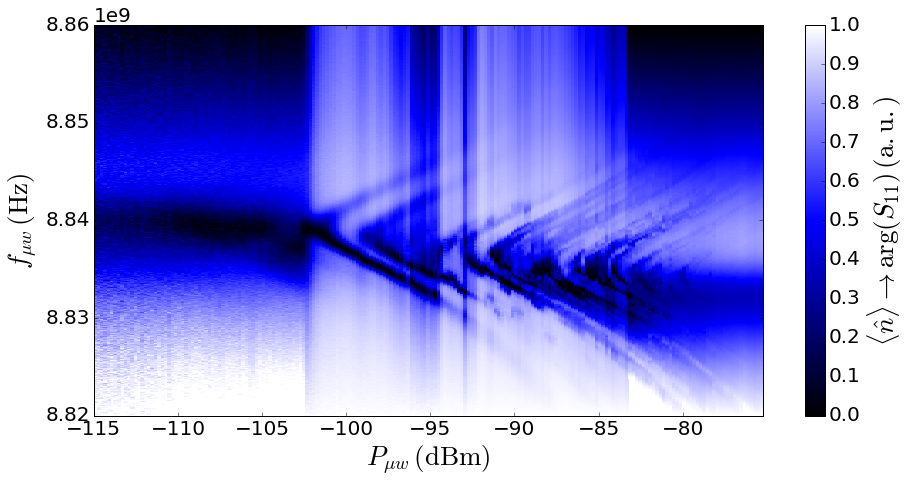

In [188]:
fig, axes = plt.subplots(figsize=(15,7))
p = axes.pcolor(X, Y, C, cmap=c_cmap)
cb = fig.colorbar(p, ax=axes)
cb.set_label(r'$\langle\hat n\rangle \rightarrow \arg (S_{11})\,\mathrm{(a.u.)}$', fontsize=labelsize)
#p.set_clim(0.7,1)
axes.set_xlim(power[0], power[-1])
#axes.set_xlim(x_val[0], 15)
axes.set_ylim(freq[0], freq[-1])
axes.set_xlabel(r'$P_{\mu w}\,(\mathrm{dBm})$', fontsize=labelsize)
axes.set_ylabel(r'$f_{\mu w}\,(\mathrm{Hz})$', fontsize=labelsize)
#fig.tight_layout()


In [96]:
fig.savefig('power_spec_115to75.png', dpi=400)